<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simulate-Car-Moving" data-toc-modified-id="Simulate-Car-Moving-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simulate Car Moving</a></span></li></ul></div>

# Simulate Car Moving

<img src="path.png">

\begin{equation}
x(t+1) = x(t) + cos\big(\phi(t) + \theta(t)\big) + sin(\theta(t))*sin(\phi(t))
\end{equation}
\begin{equation}
y(t+1) = y(t) + sin\big(\phi(t) + \theta(t)\big) - sin(\theta(t))*cos(\phi(t))
\end{equation}
\begin{equation}
\phi(t+1) = \phi(t) - sin^{-1}\left( \frac{2*sin(\theta(t))}{b}\right)
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#init vars

T = 100.00000 # total simulation length [ s ]
dt = 1.0 # step size [ s ]
time = np.arange(0 , T+dt , dt ) # step values [ s ]

theta = np.empty(len(time))
phi = np.zeros(len(time ))
y = np.empty(len(time))
x = np.empty(len(time))

b = 4
#degree
phi[0] = 0
#change to rad
phi[0] = phi[0] * np.pi/180

x[0] = 13
y[0] = 0

In [3]:
# update theta when a new order came in system
#t_start : when order come in system
#t_end : when order come out from  system

def enter_theta(t_start,t_finist,theta_input):
    global theta
    
    start  = int(t_start/dt)
    finist = int(t_finist/dt)
    n = int(T/dt)
    
    if start > n:
        start = n
        
    if finist > n:
        finist = n
        
    theta_input = theta_input*(np.pi/180)
    
    theta[start:finist]  =  theta[start:finist] + theta_input

In [4]:
def init():
    global theta
    theta = np.zeros(len(time))
    global phi
    phi = np.empty(len(time))
    global y
    y = np.empty(len(time))
    global x
    x = np.empty(len(time))
    
    theta[0] = 0
    #change to rad
    theta[0] = theta[0] * np.pi/180
    
    x[0] = 13
    y[0] = 0

In [5]:
def simulate():
    global phi
    global x
    global y
    global thetha
    
    for i in range(1,len(time)):
        x[i] = x[i-1] + np.cos((phi[i-1] + theta[i-1])) + np.sin(theta[i-1])*np.sin(phi[i-1])
        y[i] = y[i-1] + np.sin((phi[i-1] + theta[i-1])) - np.sin(theta[i-1])*np.cos(phi[i-1])
        phi[i] = phi[i-1] - np.arcsin(2*np.sin(theta[i])/b)      

In [6]:
# make pandas dataframe for save results
def make_dataframe():
    data = pd.DataFrame(data = {'theta': theta , 'time':time , 'phi':phi ,'x':x , 'y':y})
    data['theta'] = data['theta'].round(3)
    data['phi'] = data['phi'].round(3)
    data['x'] = data['x'].round(3)
    data['y'] = data['y'].round(3)
    return data 

In [7]:
def plot(data,loc):
    fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(40,30))
    fig.suptitle('Results', fontsize=25)

    f1 = data.plot(kind='line',x='time',y='phi',color='red'
            ,ax=axes[0,0],title = 'phi-time',figsize=(15,5)).set_ylabel('phi(t)')
    
    f2 = data.plot(kind='line',x='time',y='theta',color='green'
            ,ax=axes[0,1],title = 'theta-time',figsize=(15,5)).set_ylabel('theta(t)')
    
    f3 = data.plot(kind='line',x='time',y='x',color='blue'
            ,ax=axes[1,0],title = 'x-time',figsize=(15,5)).set_ylabel('x(t)')
    
    f4 = data.plot(kind='line',x='time',y='y',color='black'
            ,ax=axes[1,1],title = 'y-time',figsize=(15,5)).set_ylabel('y(t)')
    plt.show()
    
    ax = plt.gca(title = 'x-y(traveling path)')
    f5 = data.plot(kind='line',x='x',y='y',ax=ax,color='orange',figsize=(15,5)).set_ylabel('y(t)')
    plt.scatter(x=x[0],y=y[0],color='black',s=50)
    plt.scatter(x=x[len(time)-1],y=y[len(time)-1],color='blue',s=50)
    ax.legend(["moving path","start point","end point"],prop={'size': 12},loc=loc)
    
    plt.show()

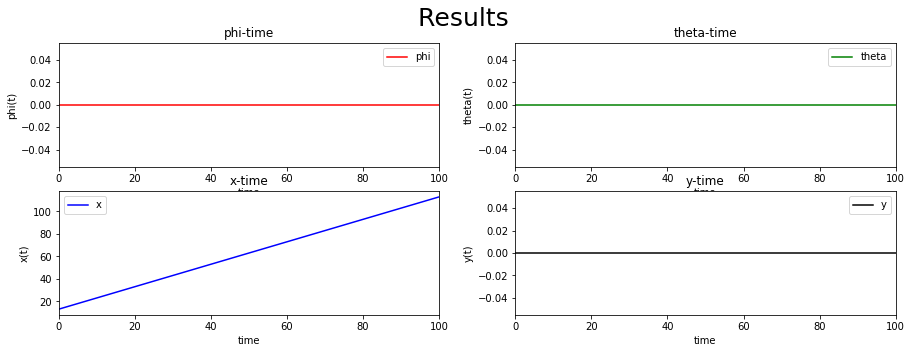

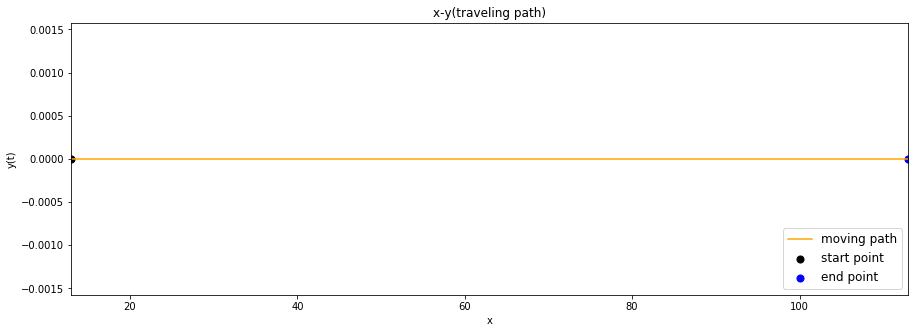

In [8]:
#first simulate phi 0 degree from start to end
init()
enter_theta(0,T+dt,0)
simulate()
data = make_dataframe()
plot(data,'lower right')

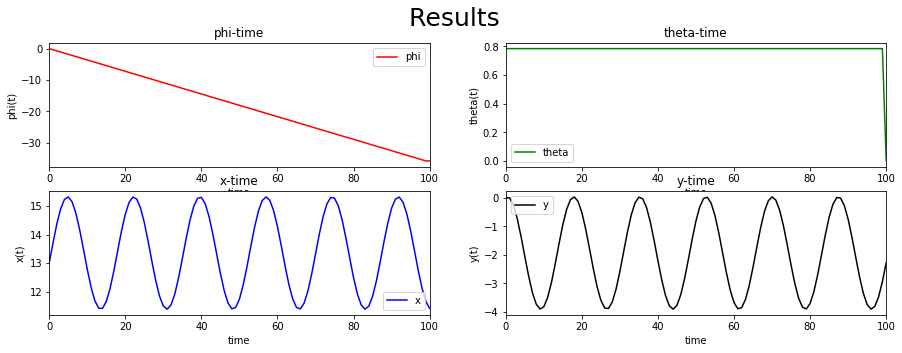

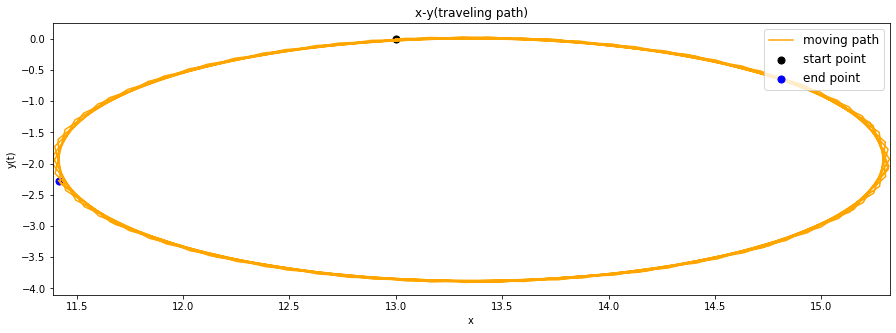

In [9]:
#second simulate phi +45 degree from start to end
init()
enter_theta(0,T+dt,45)
simulate()
data = make_dataframe()
plot(data,'upper right')

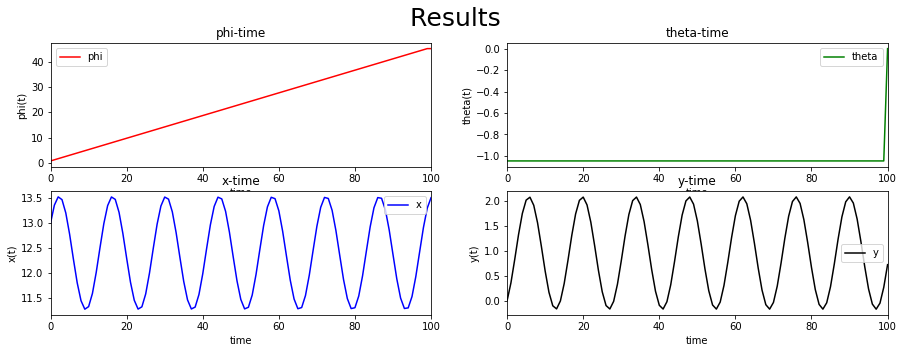

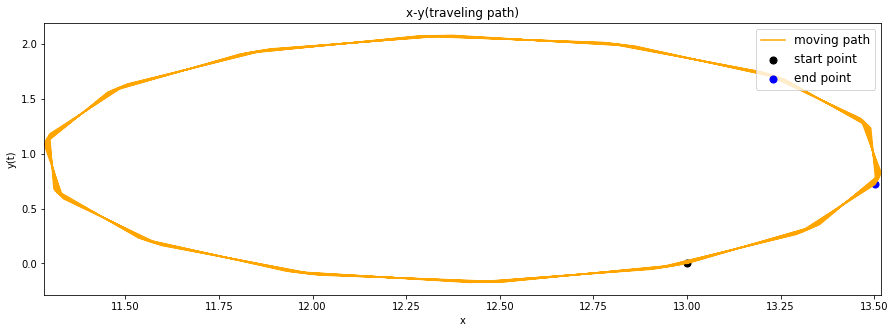

In [10]:
#third simulate phi -60 degree from start to end
init()
enter_theta(0,T+dt,-60)
simulate()
data = make_dataframe()
plot(data,'upper right')

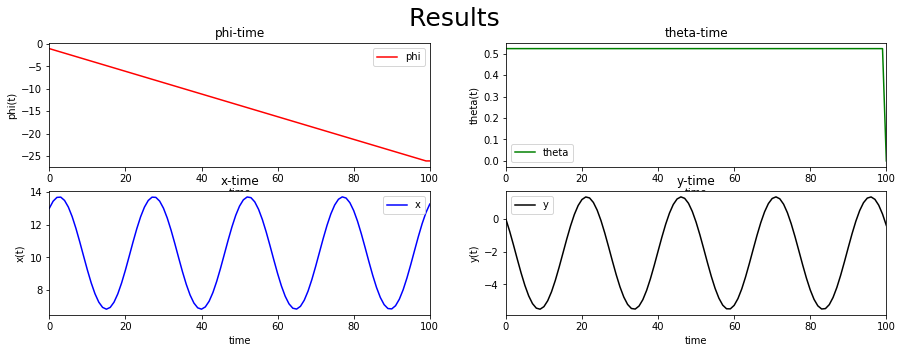

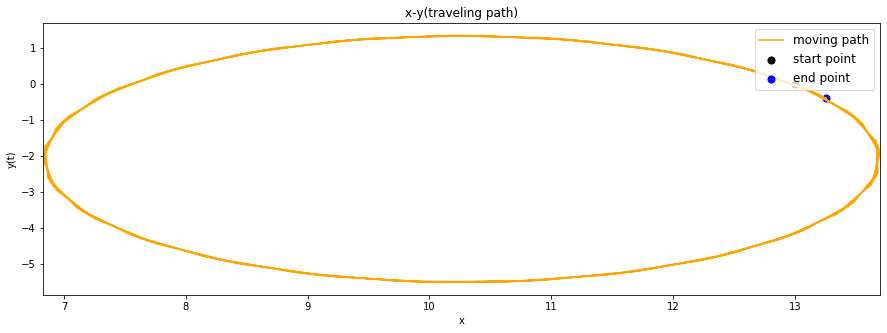

In [11]:
#4th simulate phi +30 degree from start to end
init()
enter_theta(0,T+dt,30)
simulate()
data = make_dataframe()
plot(data,'upper right')

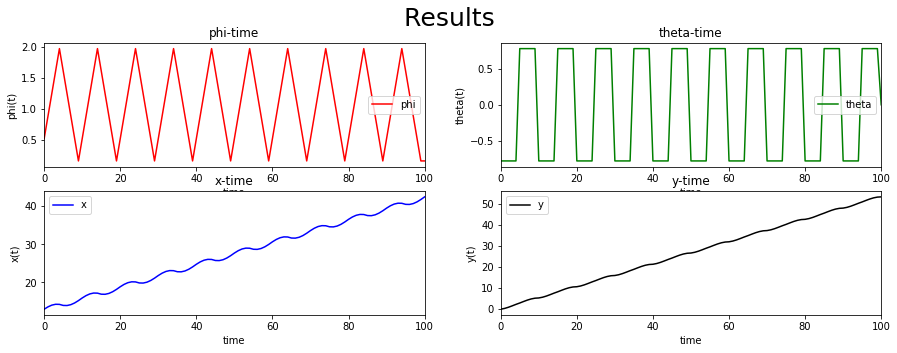

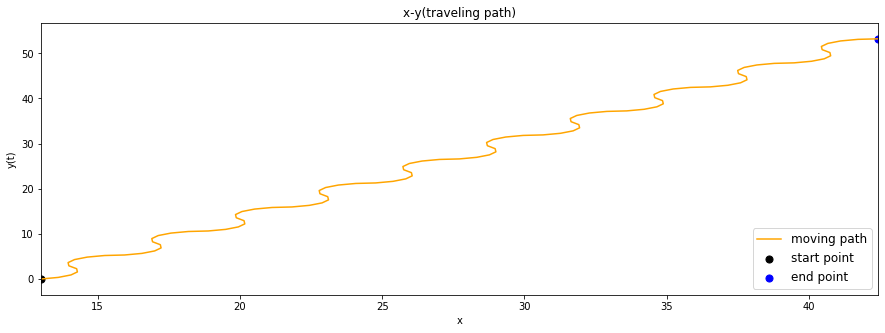

In [12]:
#5th simulate 
#each 5sec change theta -45
#each 5sec change theta +45
init()
for i in range(0,int(len(time)/5)):
    enter_theta(5*i,5*(i+1),((-1)**(i+1))*45)
simulate()
data = make_dataframe()
plot(data,'lower right')

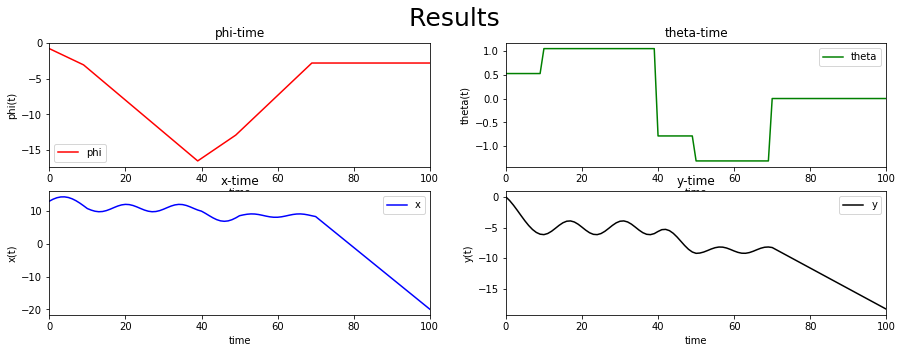

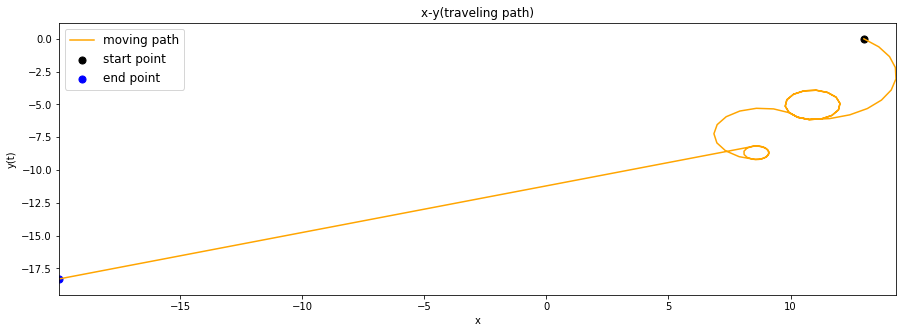

In [13]:
#6th simulate 
#theta +30 degree from start to 10 
#then theta +60 from 10 to 40 
#then theta -45 from 40 to 50 
#then theta -75 from 50 to 70
#then theta +0 from 70 to end
init()
enter_theta(0,10,30)
enter_theta(10,40,60)
enter_theta(40,50,-45)
enter_theta(50,70,-75)
enter_theta(70,T+dt,0)
simulate()
data = make_dataframe()
plot(data,'upper left')

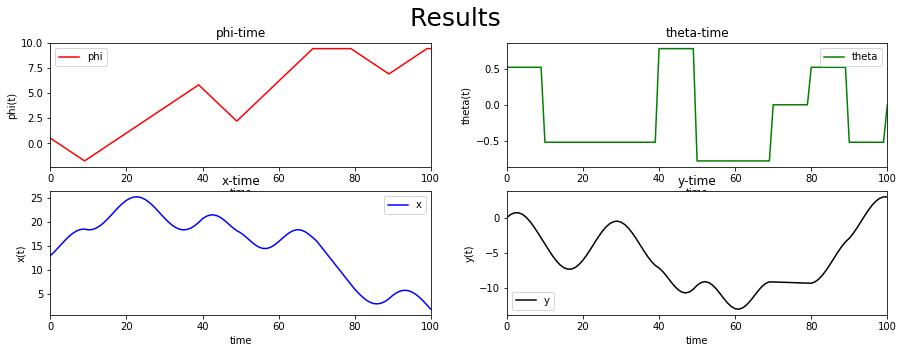

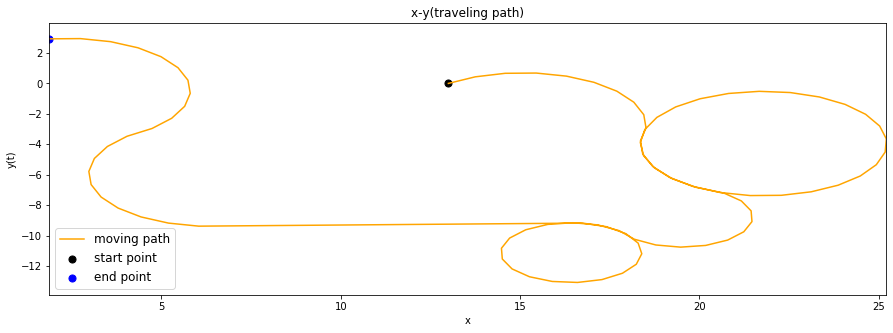

In [14]:
#7th simulate 
#theta +30 degree from start to 10 
#then theta -30 from 10 to 40 
#then theta -45 from 40 to 50 
#then theta +45 from 50 to 70
#then theta +30 from 80 to 90
#then theta -30 from 90 to 100
init()
enter_theta(0,10,30)
enter_theta(10,40,-30)
enter_theta(40,50,45)
enter_theta(50,70,-45)
enter_theta(80,90,30)
enter_theta(90,T+dt,-30)
simulate()
data = make_dataframe()
plot(data,'lower left')